In [1]:
from util import *
from metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
years = range(2009, 2019)

## Load Data

In [3]:
graphs = []  # save as array of networks
for i in years:
    eval(f"graphs.append(create_graph(pd.read_csv('data/{i}_grouped.csv')))")  # use `eval` for automation

In [4]:
gini_coef(graphs[-1])

0.6810289704290011

## Delay Analysis

In [22]:
airport_2018

,month,day_of_week,airline,ORIGIN,DEST,num_of_flights,avg_delay
0,1,0,9E,ABY,ATL,11,61.000000
1,1,0,9E,AEX,ATL,11,1.363636
2,1,0,9E,ATL,ABY,11,-7.636364
3,1,0,9E,ATL,AEX,11,8.272727
4,1,0,9E,ATL,BMI,11,110.111111
...,...,...,...,...,...,...,...
689764,12,6,YX,TLH,DCA,5,20.800000
689765,12,6,YX,TUL,DEN,4,16.250000
689766,12,6,YX,TUL,IAH,2,-5.500000
689767,12,6,YX,TYS,ORD,3,19.666667


In [110]:
delays = None
for year in years:
    df = pd.read_csv(f"data/{year}_grouped.csv")
    df = df[df["DEST"] == "LAX"]
    df["delay"] = df.num_of_flights * df.avg_delay
    df = df.groupby(["airline"]).agg({"delay": np.sum, "num_of_flights": np.sum}).reset_index()
    df["delay"] = df.delay / df.num_of_flights
    df = df.sort_values(by="delay", ascending=False)
    df = df.drop(["num_of_flights"], axis=1)
    df["year"] = year
    if delays is None:
        delays = df
    else:
        delays = pd.concat([delays, df])
delays = delays[delays["airline"].apply(lambda x: x in ["AA", "UA", "WN", "DL", "B6", "F9"])]

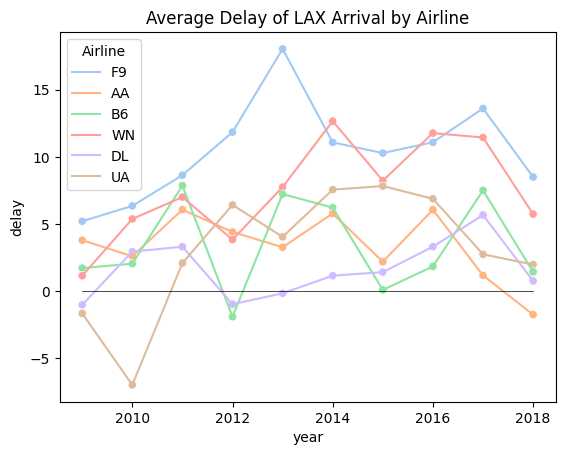

In [130]:
sns.lineplot(data=delays, x="year", y="delay", hue="airline", palette="pastel").set(title='Average Delay of LAX Arrival by Airline')
sns.scatterplot(data=delays, x="year", y="delay", hue="airline", palette="pastel", legend=None)
plt.legend(loc='best', title='Airline')
plt.plot(years, [0] * len(years), color="black", linewidth=0.5)
plt.savefig(f"./images/delay.jpg", format="jpg", dpi=300, bbox_inches="tight")


In [39]:
df

,airline,delay,year
6,MQ,22.783514,2015
7,NK,17.137594,2015
4,F9,10.281506,2015
8,OO,8.287393,2015
12,WN,8.225146,2015
9,UA,7.824694,2015
11,VX,3.859570,2015
10,US,3.095835,2015
0,AA,2.188930,2015
3,DL,1.417125,2015


In [ ]:
def delay(df):
    df = df[df["DEST"] == "LAX"]
    df["delay"] = df.num_of_flights * df.avg_delay
    df = df.groupby(["airline"]).agg({"delay": "sum", "num_of_flights": "sum"}).reset_index()
    df["delay"] = df.delay / df.num_of_flights
    

## Map Plots

In [5]:
# for i in years: 
#     eval(f"viz_map(pd.read_csv('data/{i}_grouped.csv'), {i})")

## 1b GINI

In [6]:
ginis = []
for i in graphs:
    ginis.append(gini_coef(i))

Text(0, 0.5, 'Gini Coefficient')

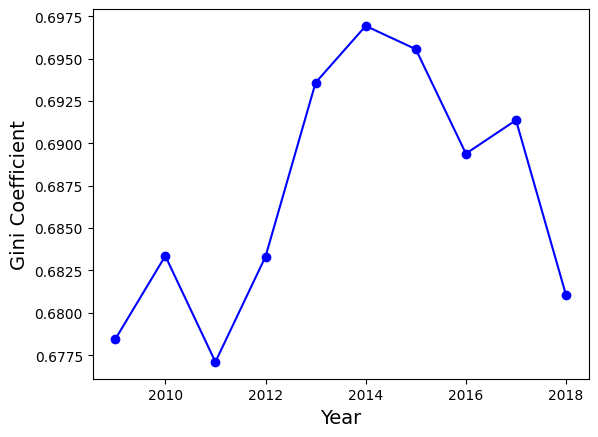

In [7]:

plt.plot(years, ginis, color="b")
plt.scatter(years, ginis, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Gini Coefficient", fontsize=14)
# plt.savefig(f"./images/1b_gini.jpg", format="jpg", bbox_inches="tight")


## 1e small world

In [7]:
cluter_coef = []
shortest_path_length = []
for i in graphs:
    cluter_coef.append(clustering_coef(i))
    shortest_path_length.append(average_shortest_path_length)

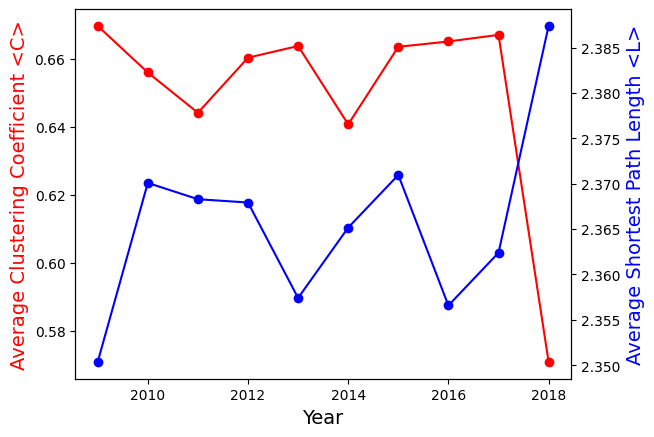

In [42]:
fig, ax = plt.subplots()
ax.plot(years, cluter_coef, color="r")
ax.set_xlabel("Year", fontsize=14)
ax.scatter(years, cluter_coef, color="r")
ax.set_ylabel("Average Clustering Coefficient <C>", color="red", fontsize=14)

ax2 = ax.twinx()
ax2.plot(years, shortest_path_length, color="b")
ax2.scatter(years, shortest_path_length, color="b")
ax2.set_ylabel("Average Shortest Path Length <L>", color="blue", fontsize=14)

plt.savefig(f"./images/1d_small_world.jpg", format="jpg", bbox_inches="tight")


## 2a resilience

This part takes around 1 hour to run on my laptop, so u probably do not want to run it

In [43]:
res = []
for i in graphs:
    res.append(resilience(i))

In [45]:
np.save("resilience.npy", res)

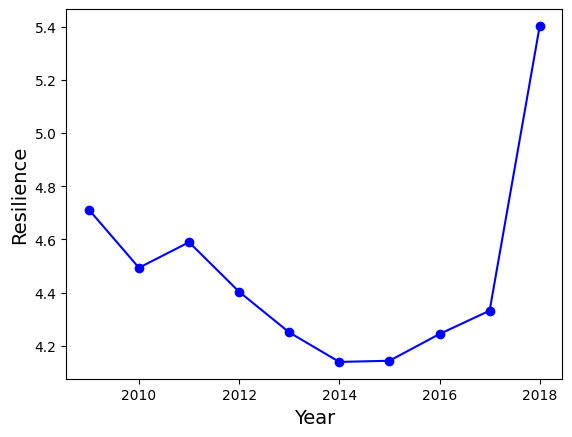

In [44]:
plt.plot(years, res, color="b")
plt.scatter(years, res, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Resilience", fontsize=14)
plt.savefig(f"./images/2a_resilience.jpg", format="jpg", bbox_inches="tight")


## 2018 Abnormality

In [16]:
airport_2018 = pd.read_csv("data/2018_grouped.csv")
airport_2017 = pd.read_csv("data/2017_grouped.csv")
airport_2015 = pd.read_csv("data/2015_grouped.csv")



In [11]:
len(set(airport_2018["ORIGIN"]).difference(set(airport_2017["ORIGIN"])))

39

In [12]:
print(set(airport_2018["ORIGIN"]).difference(set(airport_2017["ORIGIN"])))

{'CMI', 'FLO', 'USA', 'LCK', 'OWB', 'YNG', 'SPN', 'LYH', 'LBF', 'HHH', 'RFD', 'VEL', 'HTS', 'BFF', 'DBQ', 'HGR', 'OGD', 'PGV', 'CYS', 'OGS', 'SHD', 'PVU', 'SCK', 'PIE', 'STC', 'DRT', 'LWB', 'PSM', 'SFB', 'BKG', 'PRC', 'ART', 'AZA', 'BLV', 'SMX', 'LBL', 'CNY', 'SLN', 'HVN'}


In [18]:
"USA" in set(airport_2015["ORIGIN"])

False

In [21]:
airport_2018[airport_2018["ORIGIN"] == "HVN"]

,month,day_of_week,airline,ORIGIN,DEST,num_of_flights,avg_delay
4122,1,0,OH,HVN,PHL,12,19.000000
12464,1,1,OH,HVN,PHL,15,3.538462
20823,1,2,OH,HVN,PHL,15,25.727273
28800,1,3,OH,HVN,PHL,15,8.785714
36794,1,4,OH,HVN,PHL,12,13.333333
...,...,...,...,...,...,...,...
659419,12,3,OH,HVN,PHL,12,2.833333
668169,12,4,OH,HVN,PHL,12,19.750000
676931,12,5,OH,HVN,PHL,12,29.400000
685652,12,6,OH,HVN,CLT,2,51.000000
